<a href="https://colab.research.google.com/github/sanchitag507/Encipher_text_classification/blob/main/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/dataset.csv')

In [ ]:
#detects missing values and remove them
df = df[pd.notnull(df['Class'])]

In [ ]:
#print dataset
print(df.head(26))

                Class                                             clause
0            Preamble  This CREDIT AGREEMENT is entered into as of No...
1            Preamble  This agreement is dated 22 December 2014 and m...
2       Governing Law  This Agreement and shall be governed by and in...
3       Governing Law  The choice of South African law as the governi...
4       Governing Law  This agreement and other loan documents shall ...
5               Other  Eligible receivables are not subject to any li...
6               Other  “Acceptance Condition” means the condition wit...
7     Indemnification  Borrowers will indemnify each Lender against a...
8     Indemnification  The Borrower shall indemnify all parties, and ...
9     Indemnification  Administrative Agent shall be entitled to reim...
10    Indemnification  Syndication Agent shall be entitled to reimbur...
11  Lender Defaulting  Defaulting Lender’s right to approve or disapp...
12  Lender Defaulting  Lender during the defaulting

In [ ]:
#print total words in clauses
print(df['clause'].apply(lambda x: len(x.split(' '))).sum())
unq_label=df.Class.unique()
num_label=len(unq_label) #total no of unique labels
print(unq_label)

974
['Preamble' 'Governing Law' 'Other' 'Indemnification' 'Lender Defaulting']


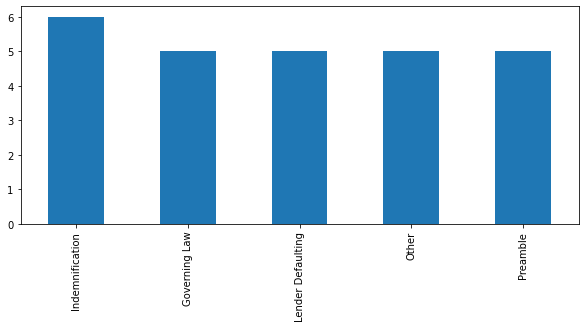

In [ ]:
plt.figure(figsize=(10,4))
df.Class.value_counts().plot(kind='bar') # plot the frequency curve

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from bs4 import BeautifulSoup

# Pre Processing

In [ ]:
import re

In [ ]:
REPLACE_BY_SPACE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
Lemma=WordNetLemmatizer()

In [ ]:
def text_cleaning(txt):
  txt = BeautifulSoup(txt, "lxml").text # HTML decoding
  txt=txt.lower() #de capitalize
  txt = REPLACE_BY_SPACE.sub(' ', txt)
  txt = BAD_SYMBOLS.sub(' ', txt)   #remove bad words
  txt = ' '.join(word for word in txt.split() if word not in STOPWORDS)   #remove stopwords
  txt = ' '.join(Lemma.lemmatize(word) for word in txt.split())  #Lemmatization
  return txt
df['clause'] = df['clause'].apply(text_cleaning)

In [ ]:
print(df)

                Class                                             clause
0            Preamble  credit agreement entered november 23 2010 amon...
1            Preamble  agreement dated 22 december 2014 made party xy...
2       Governing Law  agreement shall governed interpreted accordanc...
3       Governing Law  choice south african law governing law finance...
4       Governing Law  agreement loan document shall governed adheren...
5               Other  eligible receivables subject limitation assign...
6               Other  acceptance condition mean condition respect nu...
7     Indemnification  borrower indemnify lender loss expense may sus...
8     Indemnification  borrower shall indemnify party related party f...
9     Indemnification  administrative agent shall entitled reimbursem...
10    Indemnification  syndication agent shall entitled reimbursement...
11  Lender Defaulting  defaulting lender right approve disapprove ame...
12  Lender Defaulting  lender defaulting period res

# Feature Engineering

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#Spliting the dataset into test and train
X = df.clause
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 42)

In [ ]:
print(y_test)

8       Indemnification
16      Indemnification
0              Preamble
24                Other
11    Lender Defaulting
9       Indemnification
Name: Class, dtype: object


# Models

## **Supervised Learning**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score

**Naive Bayes Classifier**




In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
model_nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
model_nb.fit(X_train, y_train)

y_pred = model_nb.predict(X_test)

print('accuracy :', accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))
print("precision: ",precision_score(y_test,y_pred,average='weighted'))
print("recall: ",recall_score(y_test,y_pred,average='weighted'))
print("f1 score: ",f1_score(y_test,y_pred,average='weighted'))

accuracy : 0.6666666666666666
                   precision    recall  f1-score   support

    Governing Law       0.00      0.00      0.00         0
  Indemnification       1.00      0.67      0.80         3
Lender Defaulting       1.00      1.00      1.00         1
            Other       0.00      0.00      0.00         1
         Preamble       0.50      1.00      0.67         1

         accuracy                           0.67         6
        macro avg       0.50      0.53      0.49         6
     weighted avg       0.75      0.67      0.68         6

precision:  0.75
recall:  0.6666666666666666
f1 score:  0.6777777777777779


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

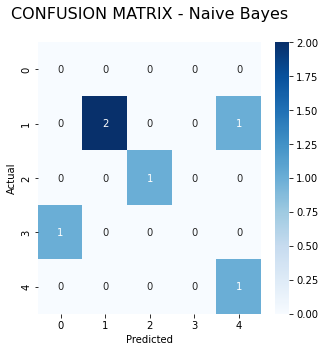

In [ ]:
conf_mat_nb = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat_nb, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - Naive Bayes\n",size=16);

**Linear Support Vector** **Machines**

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
model_sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
model_sgd.fit(X_train, y_train)

y_pred = model_sgd.predict(X_test)

print('accuracy :', accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

print("precision: ",precision_score(y_test,y_pred,average='weighted'))
print("recall: ",recall_score(y_test,y_pred,average='weighted'))
print("f1 score: ",f1_score(y_test,y_pred,average='weighted'))

accuracy : 0.6666666666666666
                   precision    recall  f1-score   support

  Indemnification       1.00      0.67      0.80         3
Lender Defaulting       0.33      1.00      0.50         1
            Other       0.00      0.00      0.00         1
         Preamble       1.00      1.00      1.00         1

         accuracy                           0.67         6
        macro avg       0.58      0.67      0.57         6
     weighted avg       0.72      0.67      0.65         6

precision:  0.7222222222222223
recall:  0.6666666666666666
f1 score:  0.65


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

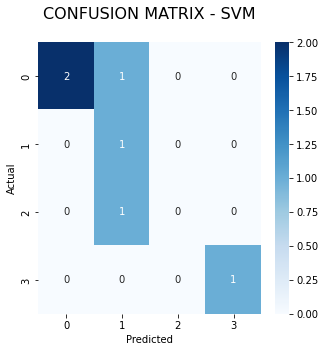

In [ ]:
conf_mat_svm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat_svm, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - SVM\n",size=16);

**Logistic Regression**

In [ ]:

from sklearn.linear_model import LogisticRegression

In [ ]:
model_log = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
model_log.fit(X_train, y_train)

y_pred = model_log.predict(X_test)

print('accuracy :', accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

print("precision: ",precision_score(y_test,y_pred,average='weighted'))
print("recall: ",recall_score(y_test,y_pred,average='weighted'))
print("f1 score: ",f1_score(y_test,y_pred,average='weighted'))

accuracy : 0.6666666666666666
                   precision    recall  f1-score   support

    Governing Law       0.00      0.00      0.00         0
  Indemnification       1.00      0.67      0.80         3
Lender Defaulting       1.00      1.00      1.00         1
            Other       0.00      0.00      0.00         1
         Preamble       0.50      1.00      0.67         1

         accuracy                           0.67         6
        macro avg       0.50      0.53      0.49         6
     weighted avg       0.75      0.67      0.68         6

precision:  0.75
recall:  0.6666666666666666
f1 score:  0.6777777777777779


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

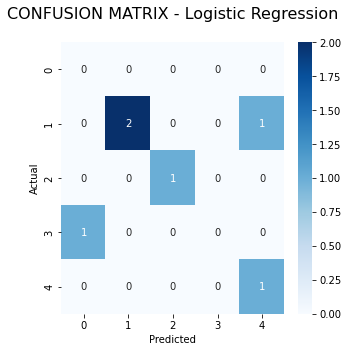

In [ ]:
conf_mat_lr = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat_lr, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - Logistic Regression\n",size=16);

**Random Forest classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)),
               ])
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

print('accuracy :', accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

print("precision: ",precision_score(y_test,y_pred,average='weighted'))
print("recall: ",recall_score(y_test,y_pred,average='weighted'))
print("f1 score: ",f1_score(y_test,y_pred,average='weighted'))

accuracy : 1.0
                   precision    recall  f1-score   support

  Indemnification       1.00      1.00      1.00         3
Lender Defaulting       1.00      1.00      1.00         1
            Other       1.00      1.00      1.00         1
         Preamble       1.00      1.00      1.00         1

         accuracy                           1.00         6
        macro avg       1.00      1.00      1.00         6
     weighted avg       1.00      1.00      1.00         6

precision:  1.0
recall:  1.0
f1 score:  1.0


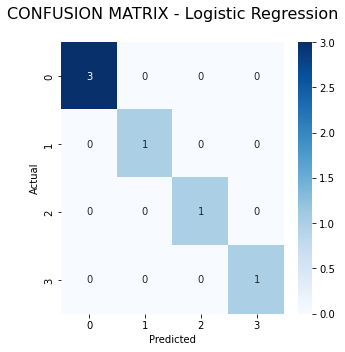

In [ ]:
conf_mat_rf = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat_rf, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - Logistic Regression\n",size=16);

## **Unsupervised Learning**

In [ ]:
import gensim  #Gensim is an open-source library for unsupervised topic modeling and natural language processing, using modern statistical machine learning.

**doc2vec with logistic regression**


> Doc2vec is an NLP tool for representing documents as a vector and is a generalizing of the word2vec method


> Numeric representation of text documents is a challenging task in machine learning. There are simplistic method like bag of words (BOW), but outcomes will be mostly mediocre, since BOW loses many subtleties of a possible good representation, e.g consideration of word ordering.


> The goal of doc2vec is to create a numeric representation of a document, regardless of its length. So instead of using just words to predict the next word, we also added another feature vector, which is document-unique.
So, when training the word vectors W, the document vector D is trained as well, and in the end of training, it holds a numeric representation of the document.


> While the word vectors represent the concept of a word, the document vector intends to represent the concept of a document. Two algorithms are- “distributed memory” (DM) and “distributed bag of words” (DBOW)









In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from gensim.models.doc2vec import TaggedDocument


#we tag every clause with its Class
def label_sentences(corpus, label_type):
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    return labeled

X_train, X_test, y_train, y_test = train_test_split(df.clause, df.Class, random_state=0, test_size=0.2)#split data into train and test
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [ ]:
#we instantiate a doc2vec model — Distributed Bag of Words (DBOW)
#building a vocabulary
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epoch in range(30):#train for 30 epochs
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 26/26 [00:00<00:00, 186413.51it/s]


In [ ]:
#building the final vector features for the classifier
def getVectors(model, c_size, v_size, v_type):
    vectors = np.zeros((c_size, v_size))
    for i in range(0, c_size):
        prefix = v_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
    
train_vectors_dbow = getVectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = getVectors(model_dbow, len(X_test), 300, 'Test')

In [ ]:
#training the logistic regression model
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(train_vectors_dbow, y_train)
logreg = logreg.fit(train_vectors_dbow, y_train)
y_pred = logreg.predict(test_vectors_dbow)
print('accuracy :', accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

print("precision: ",precision_score(y_test,y_pred,average='weighted'))
print("recall: ",recall_score(y_test,y_pred,average='weighted'))
print("f1 score: ",f1_score(y_test,y_pred,average='weighted'))

accuracy : 1.0
                   precision    recall  f1-score   support

    Governing Law       1.00      1.00      1.00         1
Lender Defaulting       1.00      1.00      1.00         1
            Other       1.00      1.00      1.00         2
         Preamble       1.00      1.00      1.00         2

         accuracy                           1.00         6
        macro avg       1.00      1.00      1.00         6
     weighted avg       1.00      1.00      1.00         6

precision:  1.0
recall:  1.0
f1 score:  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


2         Governing Law
20             Preamble
14                Other
17             Preamble
5                 Other
11    Lender Defaulting
Name: Class, dtype: object ['Governing Law' 'Preamble' 'Other' 'Preamble' 'Other' 'Lender Defaulting']


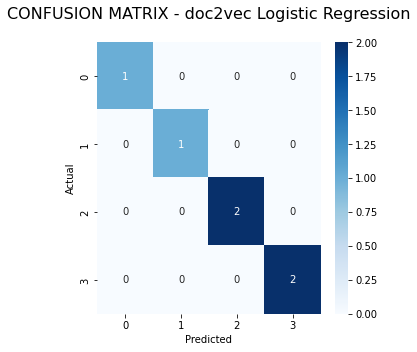

In [ ]:
print(y_test,y_pred)
conf_mat_d2v = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat_d2v, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - doc2vec Logistic Regression\n",size=16);

**Word2Vec with logistic regression**



> word2vec is a well known concept, used to generate representation vectors out of words.


> Simply labeling/one-hot encoding is a plausible way to go. However, when using such encoding, the words lose their meaning. 


> The word2vec intends to give a numeric representation for each word, that will be able to capture such relations as above.Such representations, encapsulate different relations between words, like synonyms, antonyms, or analogies. word2vec representation is created using 2 algorithms: Continuous Bag-of-Words model (CBOW) and the Skip-Gram model.







In [ ]:
from gensim.models import Word2Vec
wv = gensim.models.KeyedVectors.load_word2vec_format("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", binary=True)#loading word2vec model- It has been pre-trained by Google on a 100 billion word Google News corpus.
wv.init_sims(replace=True)

In [ ]:
def word_averaging(wv, words):#BOW based approaches that includes averaging, summation, weighted addition. The common way is to average the two word vectors.
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

def w2v_tokenize_text(text):#tokenize the text and apply the tokenization to clause column and applying word vector averaging to tokenized text
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens
    
train, test = train_test_split(df, test_size=0.2, random_state = 42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['clause']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['clause']), axis=1).values

X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).
  


In [ ]:
from sklearn.linear_model import LogisticRegression#logistic regression classifiers 
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average, train['Class'])
y_pred = logreg.predict(X_test_word_average)
print('accuracy :', accuracy_score(y_pred, test.Class))
print(classification_report(test.Class, y_pred))

print("precision: ",precision_score(y_test,y_pred,average='weighted'))
print("recall: ",recall_score(y_test,y_pred,average='weighted'))
print("f1 score: ",f1_score(y_test,y_pred,average='weighted'))

accuracy : 0.6666666666666666
                   precision    recall  f1-score   support

  Indemnification       1.00      0.67      0.80         3
Lender Defaulting       0.50      1.00      0.67         1
            Other       0.00      0.00      0.00         1
         Preamble       0.50      1.00      0.67         1

         accuracy                           0.67         6
        macro avg       0.50      0.67      0.53         6
     weighted avg       0.67      0.67      0.62         6

precision:  0.6666666666666666
recall:  0.6666666666666666
f1 score:  0.6222222222222222


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

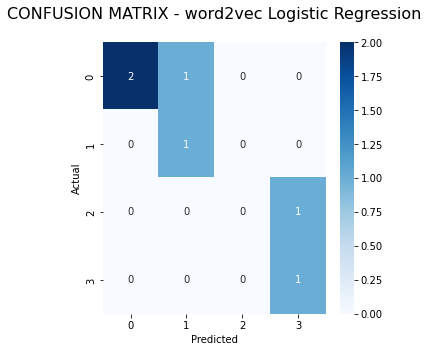

In [ ]:
conf_mat_w2v = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat_w2v, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - word2vec Logistic Regression\n",size=16);

**BOW Keras Sequential model**

In [ ]:
import itertools
import os

import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils
from tensorflow.keras.utils import to_categorical

train_size = int(len(df) * .8)
train_posts = df['clause'][:train_size]
train_tags = df['Class'][:train_size]

test_posts = df['clause'][train_size:]
test_tags = df['Class'][train_size:]

max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_posts)

x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

num_classes = np.max(y_train) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

batch_size = 32
epochs = 15

# Building the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
              
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

Epoch 1/15
1/1 [==============================] - 1s 825ms/step - loss: 1.6972 - accuracy: 0.1111 - val_loss: 1.5602 - val_accuracy: 0.0000e+00
Epoch 2/15
1/1 [==============================] - 0s 29ms/step - loss: 1.5332 - accuracy: 0.3889 - val_loss: 1.4665 - val_accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 33ms/step - loss: 1.3188 - accuracy: 1.0000 - val_loss: 1.3773 - val_accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 35ms/step - loss: 1.1769 - accuracy: 1.0000 - val_loss: 1.2918 - val_accuracy: 1.0000
Epoch 5/15
1/1 [==============================] - 0s 31ms/step - loss: 1.0211 - accuracy: 1.0000 - val_loss: 1.2108 - val_accuracy: 1.0000
Epoch 6/15
1/1 [==============================] - 0s 33ms/step - loss: 0.9227 - accuracy: 1.0000 - val_loss: 1.1340 - val_accuracy: 1.0000
Epoch 7/15
1/1 [==============================] - 0s 29ms/step - loss: 0.8063 - accuracy: 1.0000 - val_loss: 1.0607 - val_accuracy: 1.0000
Epoch 8/15
1/1 [======

In [ ]:
print(y_test)

[[0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]


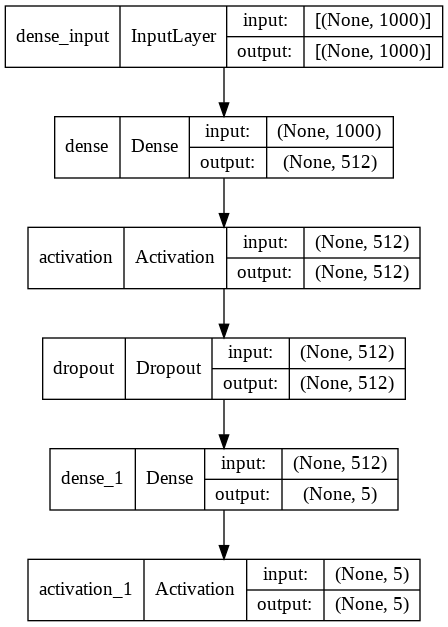

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

**LSTM**

In [ ]:
from keras.layers import Embedding,SpatialDropout1D,LSTM
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


# batch_size = 32
# epochs = 15


# embedding_vector_features=128
# voc_size=1000
# sent_length=1000
# model = Sequential()
# model.add(Embedding(voc_size,embedding_vector_features))
# model.add(LSTM(128,activation='relu',return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(128,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(32,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(num_label,activation='softmax'))
# model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# print(model.summary())

# # X_train, X_test, y_train, y_test = train_test_split(df.clause, df.Class, test_size=0.1, random_state=42)

# # model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=12,batch_size=64)

# # results = model.evaluate(X_test,y_test)
# history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)
# score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
# print('Test accuracy:', score[1])

# Simple Transformers

In [ ]:
pip install transformers

     |████████████████████████████████| 3.4 MB 7.0 MB/s 
     |████████████████████████████████| 67 kB 4.1 MB/s 
     |████████████████████████████████| 3.3 MB 56.5 MB/s 
     |████████████████████████████████| 895 kB 59.7 MB/s 
     |████████████████████████████████| 596 kB 72.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
pip install simpletransformers

     |████████████████████████████████| 248 kB 9.1 MB/s 
     |████████████████████████████████| 311 kB 54.4 MB/s 
     |████████████████████████████████| 1.2 MB 59.0 MB/s 
     |████████████████████████████████| 1.7 MB 50.9 MB/s 
     |████████████████████████████████| 43 kB 1.6 MB/s 
     |████████████████████████████████| 9.3 MB 40.2 MB/s 
     |████████████████████████████████| 180 kB 64.6 MB/s 
     |████████████████████████████████| 142 kB 65.3 MB/s 
     |████████████████████████████████| 97 kB 5.9 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 133 kB 58.0 MB/s 
     |████████████████████████████████| 1.1 MB 56.9 MB/s 
     |████████████████████████████████| 243 kB 48.2 MB/s 
     |████████████████████████████████| 94 kB 3.1 MB/s 
     |████████████████████████████████| 144 kB 60.2 MB/s 
     |████████████████████████████████| 271 kB 47.7 MB/s 
     |████████████████████████████████| 164 kB 51.6 MB/s 
     |█████████████████

In [ ]:
from simpletransformers.classification import ClassificationModel

In [ ]:
model = ClassificationModel('roberta', 'roberta-base', num_labels=num_label, use_cuda= False)
# model = ClassificationModel('roberta', 'roberta-base', num_labels=num_label, args={'learning_rate':1e-5, 'num_train_epochs': 2, 'reprocess_input_data': True, 'overwrite_output_dir': True},use_cuda= False)


Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'roberta.pooler.dense.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

In [ ]:

from collections import defaultdict
dic=defaultdict(lambda:-1)
for i in range(num_label):
  dic[i]=unq_label[i]
  dic[unq_label[i]]=i
print(dic)

train_size = int(len(df) * .8)
train_df=df[:train_size]
train_df=train_df[['clause', 'Class']]
eval_df=df[train_size:]
eval_df=eval_df[['clause', 'Class']]


for i in range(train_size):
  train_df['Class'][i]=dic[train_df['Class'][i]]
# print(eval_df['Class'][0])
for i in range(train_size,train_size+len(df)-train_size):
#   print(eval_df['Class'][i])
  eval_df['Class'][i]=dic[eval_df['Class'][i]]

defaultdict(<function <lambda> at 0x7f0d7bcdc0e0>, {0: 'Preamble', 'Preamble': 0, 1: 'Governing Law', 'Governing Law': 1, 2: 'Other', 'Other': 2, 3: 'Indemnification', 'Indemnification': 3, 4: 'Lender Defaulting', 'Lender Defaulting': 4})


In [ ]:
print(train_df.shape)
print(train_df)

(20, 2)
                                               clause Class
0   credit agreement entered november 23 2010 amon...     0
1   agreement dated 22 december 2014 made party xy...     0
2   agreement shall governed interpreted accordanc...     1
3   choice south african law governing law finance...     1
4   agreement loan document shall governed adheren...     1
5   eligible receivables subject limitation assign...     2
6   acceptance condition mean condition respect nu...     2
7   borrower indemnify lender loss expense may sus...     3
8   borrower shall indemnify party related party f...     3
9   administrative agent shall entitled reimbursem...     3
10  syndication agent shall entitled reimbursement...     3
11  defaulting lender right approve disapprove ame...     4
12  lender defaulting period respect defaulting le...     4
13  term loan agreement dated april 24 2020 among ...     0
14  applicable rate mean following percentage per ...     2
15  agreement shall governed law

In [ ]:
model.train_model(train_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:586: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/3 [00:00<?, ?it/s]

(3, 1.6325496435165405)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score

def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result, model_outputs, wrong_predictions = model.eval_model(eval_df, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/6 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
print(result)
print(model_outputs)
print(wrong_predictions)

{'mcc': 0.13483997249264842, 'f1': 0.3333333333333333, 'acc': 0.3333333333333333, 'eval_loss': 1.635553002357483}
[[-0.01336382  0.0565065   0.08841723  0.07477884 -0.04036554]
 [-0.02459949  0.06087828  0.09414579  0.09012353 -0.02831274]
 [-0.01400318  0.05918837  0.08586197  0.0914941  -0.04456942]
 [-0.01738398  0.0643327   0.10132523  0.07155807 -0.03911208]
 [-0.00429985  0.07021765  0.09775993  0.07980345 -0.038783  ]
 [-0.01805022  0.07583611  0.10244754  0.07670864 -0.04484278]]
[{'guid': 0, 'text_a': 'credit agreement made entered march 6 2018 among xyz corp wisconsin corporation borrower ssb bank usa capacity collateral agent bsb bank plc capacity administrative agent behalf lender', 'text_b': None, 'label': 0}, {'guid': 1, 'text_a': 'lender defaulting reasonably determined administrative agent borrower failed fund portion revolving loan participation letter credit swingline loan within three business day date subject legal proceeding', 'text_b': None, 'label': 4}, {'guid': 